<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/titanic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neopchi","key":"e9314cf98c2827f1e4630b82b2cd2508"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')


In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived : 생존=1, 죽음=0

pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3

sibsp : 함께 탑승한 형제 또는 배우자 수

parch : 함께 탑승한 부모 또는 자녀 수

ticket : 티켓 번호

cabin : 선실 번호

Fare : 요금

embarked : 탑승장소 S=Southhampton, C=Cherbourg, 
Q=Queenstown

1등급의 가격은 3등급의 10배 

no value끼리 연관성을 파악해서 데이터 끼리의 연관성을 검증할것

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.shape

(891, 12)

In [0]:
test.shape

(418, 11)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


나이와 cabin 선실에 대한 정보가 많이 없음 

나이를 예측 하기는 어려우니 모두 잘라내야 되나?

평균이나 계측 값을 넣어야 하나?

얼마를 넣어야 하나 


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

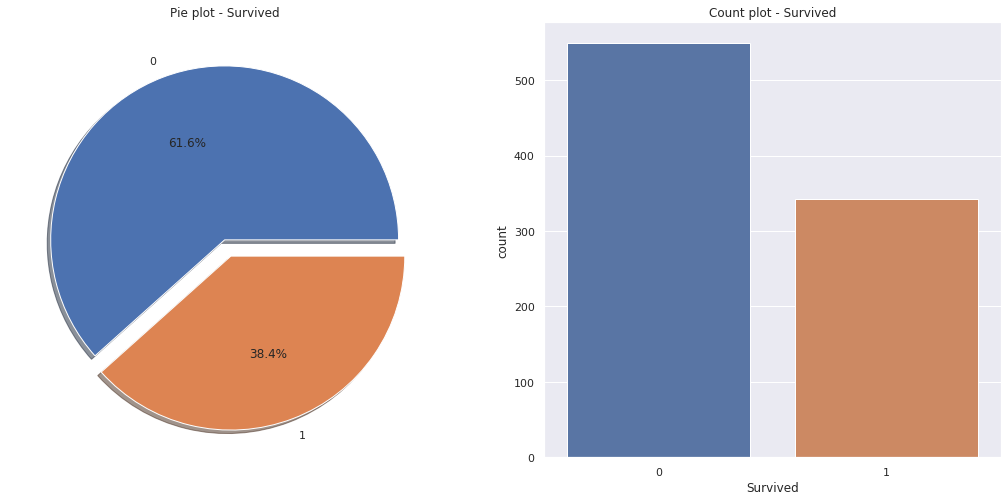

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

타켓 라벨이 어떤 분포를 띄고 있냐를 확인할 필요가 있음 

타이타닉 같은 bunary형태로 살았다 죽었다를 판단하는 기준에 있어서는 분포에 따라서 모델의 평가 방법이 달라짐 

결과를 보면 산사람은 38.4% 고 죽은 사람이 61프로임 
해당 라벨은 상당히 균일한 분포를 띄고 있음 

만약에 데이터에 다 죽고 1명만 살아서 99.9% 사망이라면 
볼것도 없이 모델이 전부 죽는다는 모델을 만들면 정확도가 99%임 예측할 필요도 없음 

그런의미에서 균일한 분포를 갖는다는것은 굉장히 중요

In [0]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

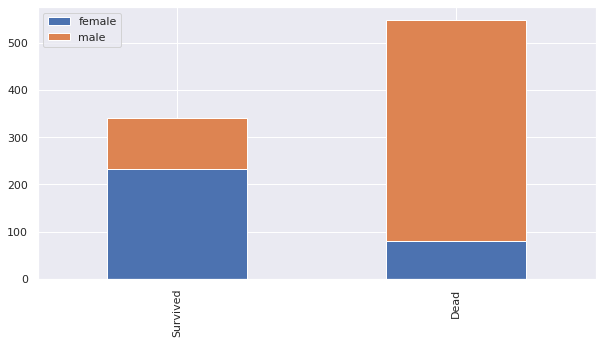

In [0]:
bar_chart('Sex')

남자보다 여자가 더 많이 살아 남음 

죽은사람도 남자가 훨씬 많음 

이것은 생존에 의미 있는 지표 


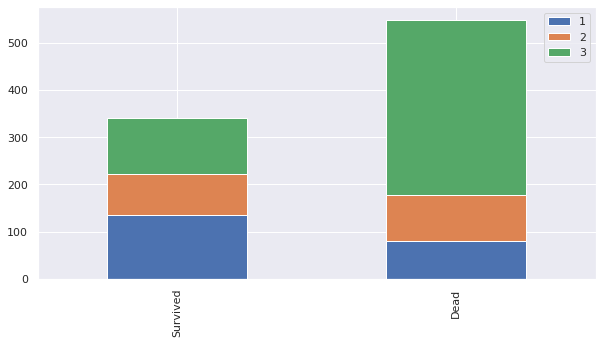

In [0]:
bar_chart('Pclass')

In [0]:
df = train[train['Pclass']==1]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************1등급 남자')
df = train[train['Pclass']==1]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************1등급 여자')
df = train[train['Pclass']==2]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************2등급 남자')
df = train[train['Pclass']==2]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************2등급 여자')
df = train[train['Pclass']==3]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************3등급 남자')
df = train[train['Pclass']==3]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************3등급 여자')

(122, 12)
0    77
1    45
Name: Survived, dtype: int64
**********************************************************1등급 남자
(94, 12)
1    91
0     3
Name: Survived, dtype: int64
**********************************************************1등급 여자
(108, 12)
0    91
1    17
Name: Survived, dtype: int64
**********************************************************2등급 남자
(76, 12)
1    70
0     6
Name: Survived, dtype: int64
**********************************************************2등급 여자
(347, 12)
0    300
1     47
Name: Survived, dtype: int64
**********************************************************3등급 남자
(144, 12)
1    72
0    72
Name: Survived, dtype: int64
**********************************************************3등급 여자


1등급 승객이 3등급 승객보다 더 많이 살아 남음 

3등급은 죽을 확률이 높음

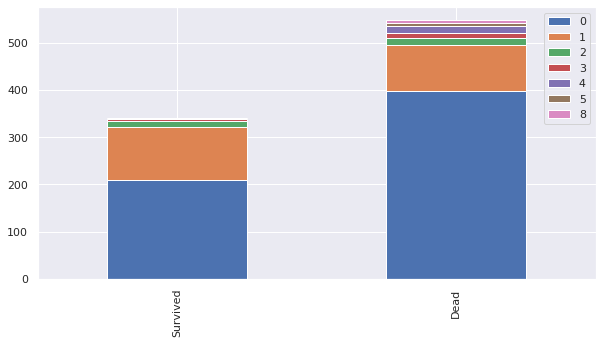

In [0]:
bar_chart('SibSp')

0은 혼자 혼 사람

그러니까 혼자 온 사람보다 형제나 가족이 있는 사람이 더 잘 살아 남음

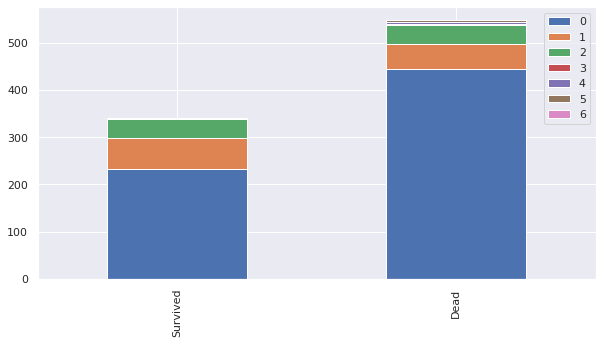

In [0]:
bar_chart('Parch')

부모나 자식이 있으면 더 잘 살아 남음

이걸로만 보면 헷갈림 

의미 있는 변수 Family 전체를 다 더하고 0을 없애서 

의미 있는 데이터를 만들고 그 결과를 분석해보자

In [0]:
#가족
train['Family'] = train['SibSp']+train['Parch'] + 1
test['Family'] = test['SibSp']+test['Parch'] + 1

train['Family'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family, dtype: float64

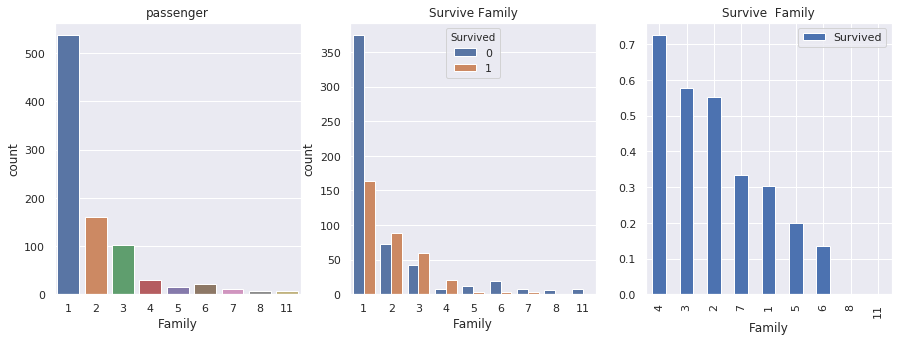

In [0]:
f,ax=plt.subplots(1, 3, figsize=(15,5))
sns.countplot('Family', data=train, ax=ax[0])
ax[0].set_title('passenger', y=1)

sns.countplot('Family', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Survive Family',  y=1)

train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survive  Family',  y=1)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

일단 혼자 혼 사람이 굉장히 많고 가족단위로 온사람들도 상당함 

그런데 분포를 보면 4명인 경우에 가장 생존확률이 높고 혼자 온 경우에는 잘 살아 남지 못함 
대가족의 경우에는 아예 산 팀이 없음 

그런의미에서 4 3 2 7을 기준으로 total Family member를 산정 하는게 좋은 방법인것 같음

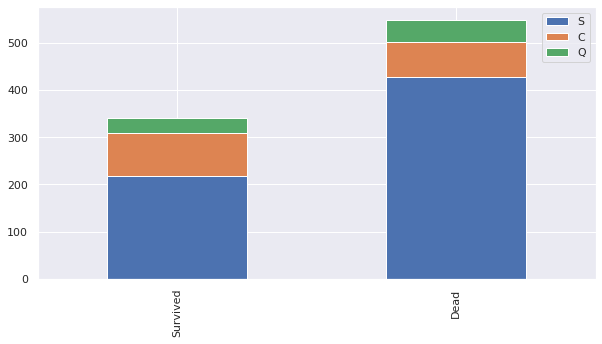

In [0]:
bar_chart('Embarked')

In [0]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
df = train[train['Survived']==1]
print(df['Age'].describe())
print('*******************살아남은 사람 연령분포********************')
df = train[train['Survived']==0]
print(df['Age'].describe())
print('*******************죽은 사람 연령분포********************')



count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
*******************살아남은 사람 연령분포********************
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
*******************죽은 사람 연령분포********************


나이가 어릴수록 더 잘 살아 남음 평균이 28인데 25%분포가 19라는것은 어린 사람의 머리수는 그렇게 많지 않지만 그에 반해서 잘 살아 남았다는 뜻임


지금까지 보면 돈 많은 사람+ 여성 or 아이 인 경우에 먼저 살아 남고 젊으면 자력으로 살아 남았고 남성은 많이 희생되었지만 젊은 남성은 자력으로 잘 살아 남았다는 합리적인 추측이 가능


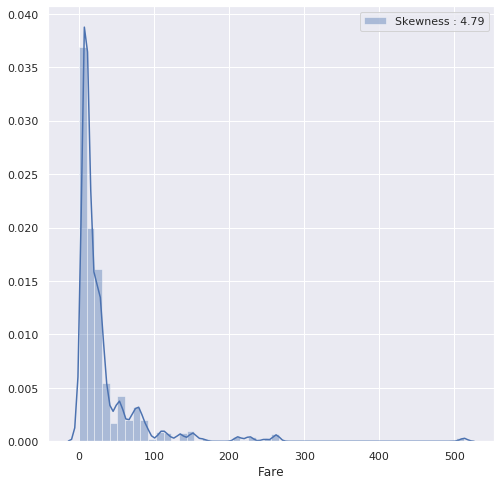

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

일단 뱃삯의  분포가 일정하지 않음 10배 넘는 가격차이는 모델링에 영향을 줄수 있음 로그를 취하기 

그리고 그 너무 비싼 배 삯은 없애서 평균을 맞춰야 할것같음 

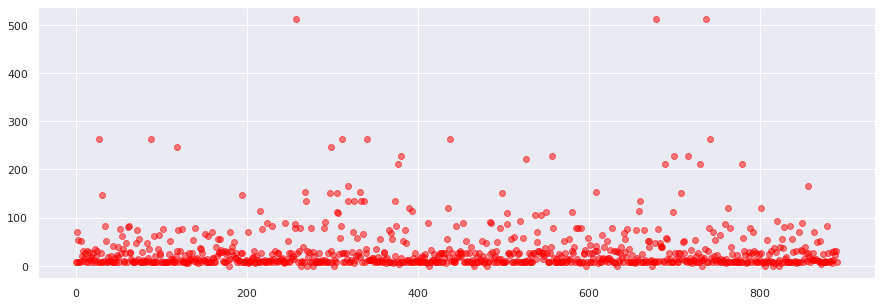

In [0]:
plt.figure(figsize=(15,5))
plt.scatter(x=train.index,y=train['Fare'], color='red', alpha=0.5)
plt.show()

500 넘어가는 애들이 3개 있네 잘라 내자 

In [0]:
print(train.shape)
train = train[train['Fare']<450]
print(train.shape)

#3개 항목 잘라냄

(891, 13)
(888, 13)


In [0]:
#중간에 맞추기 위해서 일단 로그 
import numpy as np

train['Fare'] = np.log1p(train['Fare'])

In [0]:
print('왜도 :',train['Fare'].skew())
print('첨도 :',train['Fare'].kurt())

왜도 : 0.3147203887677769
첨도 : 0.8235020592714046


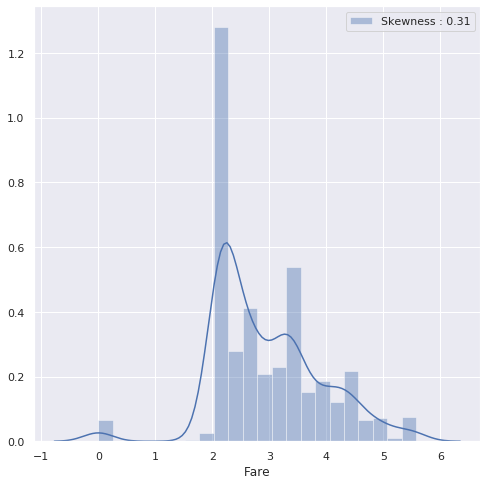

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

왜도 첨도 보정 


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    888 non-null int64
Survived       888 non-null int64
Pclass         888 non-null int64
Name           888 non-null object
Sex            888 non-null object
Age            711 non-null float64
SibSp          888 non-null int64
Parch          888 non-null int64
Ticket         888 non-null object
Fare           888 non-null float64
Cabin          202 non-null object
Embarked       886 non-null object
Family         888 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.1+ KB


In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,1


In [0]:
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

test.drop(['Name'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)


cabin은 너무 결측이 많아서 의미가 없고 

이름은 살아남는거랑 상관이 있을리가 없고 

티켓 넘버가 의미가 있을리가 없음 

전부 잘라내는게 좋을것 같음

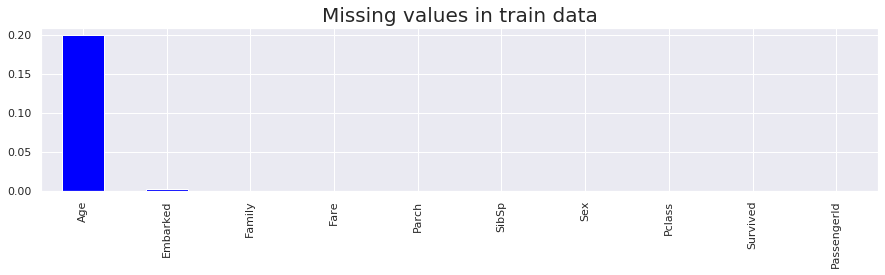

In [0]:
plt.subplots(1,0,figsize = (15,3))
train.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in train data', fontsize = 20)
plt.show()

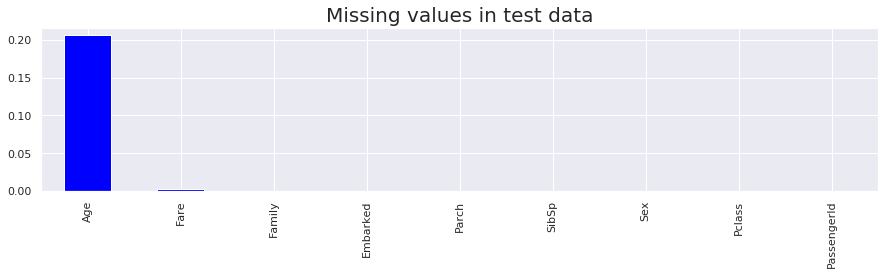

In [0]:
plt.subplots(1,0,figsize = (15,3))
test.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in test data', fontsize = 20)
plt.show()

둘다 조금씩 하자가 있음 

운좋게도 test data 에도 Age가 비슷한 분포로 값이 비어 있음 

fare나 embarked는 정말 소수라서 뭘 집어 넣어도 대세만 따르면 상관 없음 

In [0]:
train['Age'].describe()

count    711.000000
mean      29.675345
std       14.552495
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

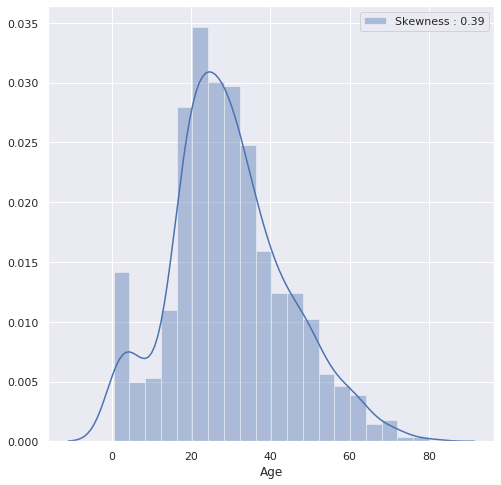

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Age'], color='b', label='Skewness : {:.2f}'.format(train['Age'].skew()), ax=ax)
g = g.legend(loc='best')

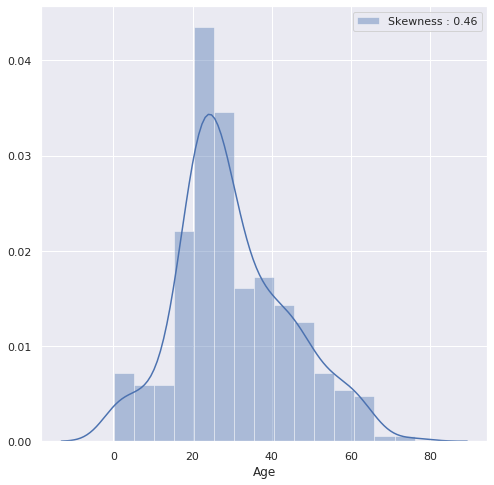

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(test['Age'], color='b', label='Skewness : {:.2f}'.format(test['Age'].skew()), ax=ax)
g = g.legend(loc='best')

In [0]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

감사하게 정규 분포를 띄고 있음 

그러면 평균값넣어도 큰 문제가 되지는 않을것 같음

In [0]:
train['Age'] = train['Age'].fillna(30)
test['Age'] = test['Age'].fillna(30)



#############################################################

#다음번에는 mr mrs 끼리 나눠서 평균 나이를 넣어주자 

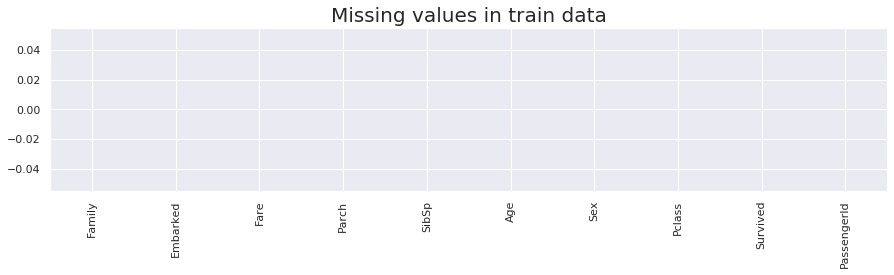

In [0]:
plt.subplots(1,0,figsize = (15,3))
train.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in train data', fontsize = 20)
plt.show()

In [0]:
train['Embarked'] = train['Embarked'].fillna(method='ffill')

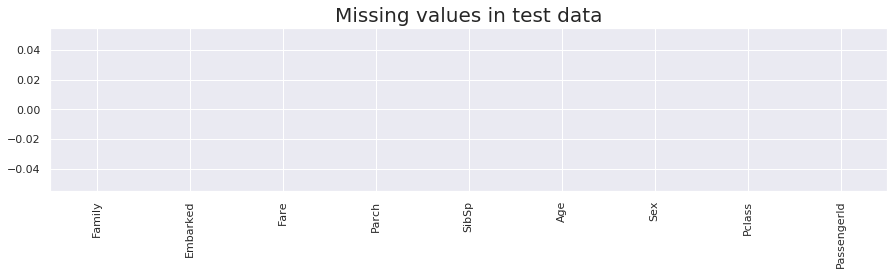

In [0]:
plt.subplots(1,0,figsize = (15,3))
test.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values in test data', fontsize = 20)
plt.show()

In [0]:
test['Fare'] = test['Fare'].fillna(method='ffill')

In [0]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,0,3,0,0,7.8292,2,1
1,893,3,1,4,1,0,7.0000,0,2
2,894,2,0,6,0,0,9.6875,2,1
3,895,3,0,2,0,0,8.6625,0,1
4,896,3,1,2,1,1,12.2875,0,3


In [0]:
#clear_housing=clear_housing.replace({'MSZoning':{'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4}})


train = train.replace({'Sex':{'male':0,'female':1}})
test = test.replace({'Sex':{'male':0,'female':1}})



TypeError: ignored

In [0]:

train = train.replace({'Embarked':{'S':0,'C':1,'Q':2}})
test = test.replace({'Embarked':{'S':0,'C':1,'Q':2}})


In [0]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
train['Age'] = train['Age'].apply(category_age)
test['Age'] = test['Age'].apply(category_age)

In [0]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,2,1,0,2.110213,0,2
1,1,1,1,3,1,0,4.280593,1,2
2,1,3,1,2,0,0,2.188856,0,1
3,1,1,1,3,1,0,3.990834,0,2
4,0,3,0,3,0,0,2.202765,0,1


In [0]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [0]:
train_y = train['Survived']

train.drop(['Survived'],axis=1,inplace=True)

In [0]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [0]:
test_y = pd.read_csv('gender_submission.csv')

test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
test_y = test_y['Survived']

In [0]:
test_y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [0]:
test_x = test

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, train_y,test_size = .3, random_state=0)

In [0]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
351,1,0,3,0,0,3.583519,0,1
124,1,0,5,0,1,4.360388,0,2
578,3,1,3,1,0,2.738146,1,2
423,3,1,2,1,1,2.734368,0,3
118,1,0,2,0,1,5.515527,1,2


## 이제 모델링하자 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle = True, random_state=0)

## cross validation k겹 진행

In [0]:
clf = KNeighborsClassifier(n_neighbors=13)

scoring = 'accuracy'
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.79365079 0.75806452 0.74193548 0.79032258 0.80645161 0.80645161
 0.87096774 0.79032258 0.77419355 0.82258065]


In [0]:
#knn score
round(np.mean(score)*100,2)

79.55

# 결정트리

In [0]:
clf = DecisionTreeClassifier()

In [0]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
scoring = 'accuracy'
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.82258065 0.69354839 0.72580645 0.85483871 0.80645161
 0.82258065 0.82258065 0.82258065 0.77419355]


In [0]:
#결정트리 score
round(np.mean(score)*100,2)

79.23

In [0]:
clf = RandomForestClassifier(n_estimators=13)

scoring = 'accuracy'
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.80952381 0.82258065 0.79032258 0.72580645 0.85483871 0.83870968
 0.85483871 0.82258065 0.75806452 0.83870968]


In [0]:
#랜덤포레스트 score
round(np.mean(score)*100,2)

81.16

In [0]:
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.79365079 0.79032258 0.77419355 0.70967742 0.74193548 0.79032258
 0.82258065 0.77419355 0.75806452 0.70967742]


In [0]:
#나이브 베이즈 score
round(np.mean(score)*100,2)

76.65

In [0]:
clf = SVC(C=1,kernel='rbf',coef0 = 1)

scoring = 'accuracy'
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82539683 0.82258065 0.80645161 0.75806452 0.83870968 0.87096774
 0.93548387 0.83870968 0.80645161 0.79032258]


In [0]:
#SVM score
round(np.mean(score)*100,2)

82.93

In [0]:
clf.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
prediction = clf.predict(x_test)

In [0]:
print(prediction)

[1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 1]


In [0]:
y=np.array(y_test)
print(y)

[0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1]


In [0]:
cnt=0 
for i in range(len(y)):
  if y[i]==prediction[i]:
    cnt+=1
  
print('전체 : ',len(y))
print('맞춘수 : ',cnt)
print('비율 : ',cnt/len(y))

전체 :  267
맞춘수 :  216
비율 :  0.8089887640449438
